<center>
    <h1>
        <b>Mario Ferreyra | Emiliano Kokic</b>
    </h1>
    <h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
    <h3>Análisis Exploratorio y Curación de Datos</h3>
</center>

# **Laboratorio: Pasos necesarios**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import preprocessing

In [2]:
building_permits = pd.read_csv("building_permits-for-pandas.csv",
                               index_col="Permit Number",
                               parse_dates=["Permit Creation Date", "Current Status Date", "Filed Date"])

pd.options.display.float_format = '{:.2f}'.format

/home/mferreyra/.virtualenvs/diplodatos-ayc/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
building_permits.shape

(181495, 42)

In [4]:
building_permits.describe(include='all')

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
count,181495.00,181495,181495,181495,181495,181495.00,1547,181495,178841,26272.00,...,141666.00,141666,141367.00,141367,4453,179887.00,179879,179888.00,179904,181495.00
unique,nan,8,1291,4894,1041,nan,16,1702,21,nan,...,nan,5,nan,5,1,nan,41,nan,57487,nan
top,nan,otc alterations permit,2017-09-15 00:00:00,3708,001,nan,A,Market,St,nan,...,nan,wood frame (5),nan,wood frame (5),Y,nan,Financial District/South Beach,nan,"(37.79226164705184, -122.4034859571375)",nan
freq,nan,164102,330,1190,9404,nan,1078,5260,125578,nan,...,nan,100533,nan,101140,4453,nan,21384,nan,553,nan
first,nan,NaN,2012-03-28 00:00:00,NaN,NaN,nan,NaN,NaN,NaN,nan,...,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan
last,nan,NaN,2018-02-23 00:00:00,NaN,NaN,nan,NaN,NaN,NaN,nan,...,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan
mean,7.55,NaN,NaN,NaN,NaN,1111.82,NaN,NaN,NaN,80.43,...,4.00,NaN,4.02,NaN,NaN,5.52,NaN,94115.43,NaN,1145595875291.82
std,1.41,NaN,NaN,NaN,NaN,1132.49,NaN,NaN,NaN,333.10,...,1.62,NaN,1.62,NaN,NaN,2.88,NaN,9.32,NaN,504490378527.80
min,1.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,1.00,NaN,1.00,NaN,NaN,1.00,NaN,94102.00,NaN,12935321500.00
25%,8.00,NaN,NaN,NaN,NaN,233.00,NaN,NaN,NaN,0.00,...,3.00,NaN,3.00,NaN,NaN,3.00,NaN,94109.00,NaN,1305357662114.00


In [5]:
# Set seed for reproducibility
np.random.seed(0)

## 2. Pasos necesarios

### 2.1 Etiquetas de variables/columnas: no usar caracteres especiales

In [6]:
# Helpful character encoding module
import chardet

#### Verificar que no haya problemas de codificación/encoding

In [7]:
# Look at the first ten thousand bytes to guess the character encoding
with open("Building_Permits.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# Check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


Chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas.

Tambien pasamos los nombres de las columnas a lower case.

In [8]:
# ############################ NO ANDA LO COMENTADO DE ABAJO ############################
# building_permits.columns != building_permits.columns.str.extract(r'^(\w+)$')

In [9]:
building_permits.columns = map(str.lower, building_permits.columns.str.replace(' ', '_'))
#building_permits.head()
building_permits.index.name = map(str.lower, building_permits.index.name.replace(' ', '_'))
building_permits.head()

,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,...,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location,record_id
,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,Ellis,St,nan,...,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945
201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,Geary,St,0.00,...,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718
201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,NaN,Pacific,Av,nan,...,1.00,constr type 1,1.00,constr type 1,NaN,3.00,Russian Hill,94109.00,"(37.7946573324287, -122.42232562979227)",1424856504716
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,0.00,...,5.00,wood frame (5),5.00,wood frame (5),NaN,3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566
201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,Market,St,nan,...,3.00,constr type 3,nan,NaN,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992


### 2.2 Tratamos los valores faltantes

Veamos cuantos valores nulos tenemos

In [10]:
# Get the number of missing data points per column
missing_values_count = building_permits.isnull().sum()
#display(missing_values_count)

# Look at the # of missing points by columns
missing_values_count[missing_values_count > 0]

street_number_suffix                      179948
street_suffix                               2654
unit                                      155223
unit_suffix                               179770
description                                  275
issued_date                                13312
completed_date                             92554
first_construction_document_date           13319
structural_notification                   175348
number_of_existing_stories                 39303
number_of_proposed_stories                 39849
voluntary_soft-story_retrofit             181470
fire_only_permit                          163927
permit_expiration_date                     47417
estimated_cost                             35192
revised_cost                                5349
existing_use                               37827
existing_units                             47806
proposed_use                               39441
proposed_units                             47633
plansets            

In [11]:
print("Cantidad de filas sin dropear valores nulos: {}".format(len(building_permits)))

print("Cantidad de filas dropeando valores nulos: {}".format(len(building_permits.dropna())))
#len(building_permits.dropna())/len(building_permits)

Cantidad de filas sin dropear valores nulos: 181495
Cantidad de filas dropeando valores nulos: 0


Analicemos la columna **estimated_cost** para decidir como imputar los valores NaN

In [12]:
estimated_cost = building_permits.estimated_cost.to_frame()

#display(estimated_cost.head(10))
display(estimated_cost.describe())

nan_values = estimated_cost.isnull().sum().get_values()[0]
print('# Missing values:', nan_values)

,estimated_cost
count,146303.00
mean,153645.17
std,3433661.53
min,1.00
25%,3500.00
50%,11000.00
75%,35000.00
max,537958646.00


# Missing values: 35192


In [13]:
# En este caso se imputaran los missing values utilizando la media
estimated_cost = estimated_cost.fillna(estimated_cost.mean())

nan_values = estimated_cost.isnull().sum().get_values()[0]
print('# Missing values:', nan_values)

building_permits.estimated_cost = estimated_cost

# Missing values: 0


Más métodos disponibles en:
* https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-missing
* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## 2.3. Codificar variables

Las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas

Trabajaremos sobre la columna **current_status**

In [14]:
# building_permits.describe(include=['O'])
# building_permits.current_status.head(5)
building_permits.current_status.to_frame().describe()

,current_status
count,181495
unique,14
top,complete
freq,88842


Veamos las posibles categorias que puede llegar a tomar la columna **current_status** 

In [15]:
building_permits.current_status.unique()

array(['expired', 'issued', 'withdrawn', 'complete', 'filed', 'approved',
       'reinstated', 'cancelled', 'appeal', 'suspend', 'revoked',
       'plancheck', 'disapproved', 'incomplete'], dtype=object)

In [16]:
# Create a label (category) encoder object
label_encoder = preprocessing.LabelEncoder()

# Fit the encoder to the pandas column
label_encoder.fit(building_permits.current_status)

LabelEncoder()

In [17]:
# View encoder mapping
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'appeal': 0,
 'approved': 1,
 'cancelled': 2,
 'complete': 3,
 'disapproved': 4,
 'expired': 5,
 'filed': 6,
 'incomplete': 7,
 'issued': 8,
 'plancheck': 9,
 'reinstated': 10,
 'revoked': 11,
 'suspend': 12,
 'withdrawn': 13}

Apliquemos la codificacion a la columna **current_status**

In [18]:
# Apply the fitted encoder to the pandas column
building_permits.current_status = label_encoder.transform(building_permits.current_status)

Veamos como quedan las variables codificadas

In [19]:
building_permits['current_status'].to_frame().head()

,current_status
,
201505065519,5
201604195146,8
201605278609,13
201611072166,3
201611283529,8


More about preprocessing in http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## 2.4. No cambiar los nombres de las variables de la fuente de origen

## 2.5. Verificar la consistencia de las variables
Aplicar reglas de integridad

In [20]:
building_permits.head()

,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,...,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location,record_id
,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,Ellis,St,nan,...,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945
201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,Geary,St,0.00,...,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718
201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,NaN,Pacific,Av,nan,...,1.00,constr type 1,1.00,constr type 1,NaN,3.00,Russian Hill,94109.00,"(37.7946573324287, -122.42232562979227)",1424856504716
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,0.00,...,5.00,wood frame (5),5.00,wood frame (5),NaN,3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566
201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,Market,St,nan,...,3.00,constr type 3,nan,NaN,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992


Hay casos en que **completed_date** es mayor a la fecha de expiracion?

In [21]:
# building_permits.columns
completed_expiration_date = building_permits[['completed_date', 'permit_expiration_date']]
completed_expiration_date.head()

,completed_date,permit_expiration_date
,,
201505065519,NaN,11/03/2016
201604195146,NaN,12/03/2017
201605278609,NaN,NaN
201611072166,07/24/2017,07/13/2018
201611283529,NaN,12/01/2018


Descartemos los valores NaN para poder comparar todas las fechas

In [22]:
completed_expiration_date = completed_expiration_date.dropna()
completed_expiration_date.head()

,completed_date,permit_expiration_date
,,
201611072166,07/24/2017,07/13/2018
201706300814,07/12/2017,06/25/2018
201710110928,10/31/2017,04/11/2018
201407080724,09/08/2017,09/05/2016
201408254591,10/04/2017,08/20/2015


Veamos el tipo que de las columnas **completed_date** y **permit_creation_date**.

In [23]:
completed_expiration_date.dtypes

completed_date            object
permit_expiration_date    object
dtype: object

Indiquemos que las columnas **completed_date** y **permit_creation_date** son fechas.

In [24]:
completed_expiration_date.completed_date = pd.to_datetime(completed_expiration_date.completed_date)
completed_expiration_date.permit_expiration_date = pd.to_datetime(completed_expiration_date.permit_expiration_date)

completed_expiration_date.dtypes

completed_date            datetime64[ns]
permit_expiration_date    datetime64[ns]
dtype: object

In [25]:
completed = 'completed_date'
expiration = 'permit_expiration_date'

df = completed_expiration_date[completed_expiration_date[completed] > 
                               completed_expiration_date[expiration]]
display(df.head())
display(df.count())

,completed_date,permit_expiration_date
,,
201407080724,2017-09-08,2016-09-05
201408254591,2017-10-04,2015-08-20
201602179775,2017-10-13,2017-06-26
201604064066,2017-09-28,2017-04-01
201609097214,2017-09-22,2017-09-04


completed_date            7375
permit_expiration_date    7375
dtype: int64

## 2.6. Identificar y documentar valores atípicos/outliers

"There are many rules of thumb for how to define an outlier but there is no silver bullet. One rule of thumb is that any data point that is three standard deviations away from the mean of the same data point for all observations."

In [26]:
outliers = building_permits[building_permits.estimated_cost > 
                            (building_permits.estimated_cost.mean() 
                             + 3 * building_permits.estimated_cost.std())]
display(outliers.describe())

,permit_type,street_number,unit,current_status,number_of_existing_stories,number_of_proposed_stories,estimated_cost,revised_cost,existing_units,proposed_units,plansets,existing_construction_type,proposed_construction_type,supervisor_district,zipcode,record_id
count,266.00,266.00,12.00,266.00,54.00,262.00,266.00,183.00,40.00,231.00,266.00,52.00,261.00,265.00,265.00,266.00
mean,1.73,902.11,0.00,6.14,9.24,10.21,45912596.45,55788683.40,89.92,127.84,2.06,1.65,1.73,6.98,94114.71,1228149405248.21
std,1.37,854.19,0.00,2.25,8.09,10.28,65924871.20,88869537.66,162.17,125.95,0.33,1.25,1.37,2.45,15.11,434126168426.43
min,1.00,1.00,0.00,1.00,0.00,0.00,9408000.00,0.00,0.00,0.00,2.00,1.00,1.00,1.00,94102.00,130366381787.00
25%,1.00,250.00,0.00,6.00,3.25,5.00,15000000.00,15000000.00,0.00,50.50,2.00,1.00,1.00,6.00,94103.00,1327233849221.25
50%,1.00,629.50,0.00,6.00,7.00,7.00,26000000.00,27000000.00,0.00,94.00,2.00,1.00,1.00,6.00,94107.00,1390780319290.50
75%,2.00,1413.00,0.00,8.00,12.00,12.00,48914326.50,50000000.00,101.25,156.50,2.00,2.00,2.00,10.00,94124.00,1438144502463.00
max,8.00,5830.00,0.00,13.00,35.00,63.00,537958646.00,780500000.00,685.00,685.00,6.00,5.00,5.00,11.00,94158.00,1497900503272.00


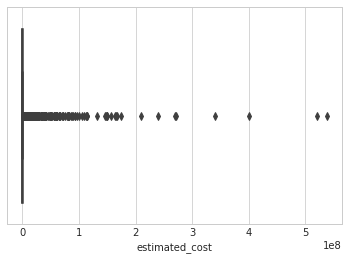

In [27]:
sns.set_style('whitegrid')
sns.boxplot(building_permits.estimated_cost)

## 2.7. Evaluar cómo comprimir los datos 
Para su almacenamiento más eficiente.

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la velocidad para leerlo que suele ser determinante a la hora de determinar el formato de almacenamiento.

## 2.8. Guardar el set de datos con un nombre informativo.